<a href="https://colab.research.google.com/github/BillWorstell/DiffDRR/blob/main/mphDRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://vivekg.dev/DiffDRR/

install DiffDRR from PyPI:

In [1]:
!pip install diffdrr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.1 MB/s eta 0:00:00


https://colab.research.google.com/github/facebookresearch/pytorch3d/blob/stable/docs/tutorials/camera_position_optimization_with_differentiable_rendering.ipynb#scrollTo=sEVdNGFwripM

In [2]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=eba16a2ef32de35202c4c5ec1c1eded0881d99dfe57db9a6b61b955a7e17e161
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=e04e943125106a0398e190869c67eb89b529616d0851ab4a241d75429dba6a5a
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu121_pyt210/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 167.1 MB/s eta 0:00:00


https://vivekg.dev/DiffDRR/

Usage

The following minimal example specifies the geometry of the projectional radiograph imaging system and traces rays through a CT volume:

In [3]:
import matplotlib.pyplot as plt
import torch

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/


In [4]:
#!conda --version

If !conda --version returns no results, install conda with :

In [5]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

Install and import modules

https://pytorch3d.org/tutorials/

https://github.com/facebookresearch/pytorch3d/blob/main/INSTALL.md


In [6]:
#!conda create -n pytorch3d python=3.9
#!conda activate pytorch3d
#!conda install pytorch=1.13.0 torchvision pytorch-cuda=11.6 -c pytorch -c nvidia
#!conda install -c fvcore -c iopath -c conda-forge fvcore iopath

# Read in the volume and get the isocenter

In [7]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2

Install icecream for debug printing

https://github.com/gruns/icecream

In [8]:
!pip install icecream
from icecream import ic

Get characteristics of volume

In [9]:
ic(volume.dtype)
ic(volume.shape)
ic(volume.size)

ic| volume.dtype: dtype('float32')
ic| volume.shape: (512, 512, 133)
ic| volume.size: 34865152


34865152

Get voxel spacing

In [10]:
ic(spacing)

ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Initialize the DRR module for generating synthetic X-rays

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
drr = DRR(
    volume,      # The CT volume as a numpy array
    spacing,     # Voxel dimensions of the CT
    sdr=300.0,   # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,    # Pixel spacing (in mm)
).to(device)

Set the camera pose with rotation (yaw, pitch, roll) and translation (x, y, z)

In [12]:
rotation = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
translation = torch.tensor([[bx, by, bz]], device=device)

Also note that DiffDRR can take many representations of SO(3) 📸

For example, quaternions, rotation matrix, axis-angle, etc...

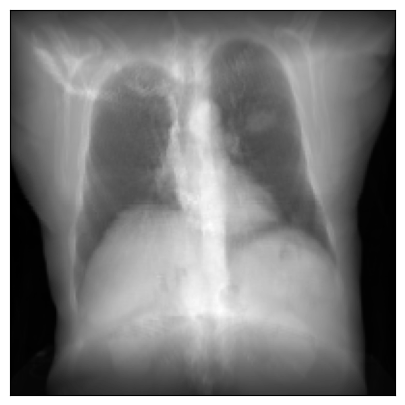

In [13]:
img = drr(rotation, translation, parameterization="euler_angles", convention="ZYX")
plot_drr(img, ticks=False)
plt.show()

Get size of image

In [14]:
ic(img.shape)

ic| img.shape: torch.Size([1, 1, 200, 200])


torch.Size([1, 1, 200, 200])

## DRR Generation

`DiffDRR` is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd.
This also means that DRR generation is available as a layer in deep learning frameworks.

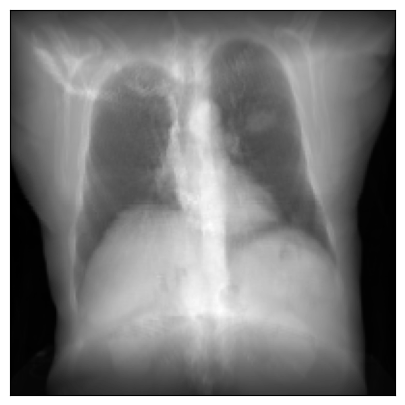

In [15]:
#| cuda
# Read in the volume and get the isocenter
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2

# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=300.0,  # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,  # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
plot_drr(img, ticks=False)
plt.show()

Install matplotlib and numpy

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

!pip install icecream
from icecream import ic

Input from .xlsx file

MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.fix

From Google drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/SPECTGeometry/'

Mounted at /content/drive


In [18]:
!ls -ltr /content/drive/MyDrive/SPECTGeometry/

total 1223
-rw------- 1 root root 461819 Dec 19 14:27 MDSL.excel80M10RFR.cut-plate.007.150roi.2.30pin.105ellipse.fix.xlsx
-rw------- 1 root root 790185 Dec 22 19:19 MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx


Install openpyxl using pip

In [19]:
pip install openpyxl

https://openpyxl.readthedocs.io/en/stable/tutorial.html#loading-from-a-file

In [20]:
from openpyxl import load_workbook
wb = load_workbook(filename = '/content/drive/MyDrive/SPECTGeometry/MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx',data_only=True)

loop through worksheets

In [21]:
for sheet in wb:
...     print(sheet.title)

Main
Coordinates
MDSL cloud import
Theta
Values
Design Table


Go to Coordinates Worksheet

In [22]:
wb.active = 1
print(wb.active.title)
ws = wb.active

Coordinates


Length of Collimator

In [23]:
ic(ws.cell(2,7).value)
lcoll=np.zeros(80)
for i in range(3,83):
  lcoll[i-3]=(ws.cell(i,7).value)

ic| ws.cell(2,7).value: 'length of collimator'


Choose vsdr = 5 * length of collimato

In [24]:
vsdr=5.*lcoll

alpha: Azimuthal angle (radians)

In [25]:
ic(ws.cell(2,22).value)
alpha=np.zeros(80)
for i in range(3,83):
  alpha[i-3]=(ws.cell(i,22).value)

ic| ws.cell(2,22).value: 'pinhole azimuth (radians)'


beta = altitude (radians)

In [26]:
ic(ws.cell(2,23).value)
beta=np.zeros(80)
for i in range(3,83):
  beta[i-3]=(ws.cell(i,23).value)

ic| ws.cell(2,23).value: 'pinhole elevation (radians)'


DRR Generation

DiffDRR is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd. This also means that DRR generation is available as a layer in deep learning frameworks.

Display Wide FOV for camera [0]

ic| bx0.dtype: torch.float32
ic| bx.dtype: torch.float32
ic| rotations0: tensor([[3.1416, 0.0000, 1.5708]], device='cuda:0')
ic| rotations0.dtype: torch.float32
ic| rotations: tensor([[ 0.2488, -0.2403,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 250, 250])
ic| imgMax: tensor(80.4909, device='cuda:0')


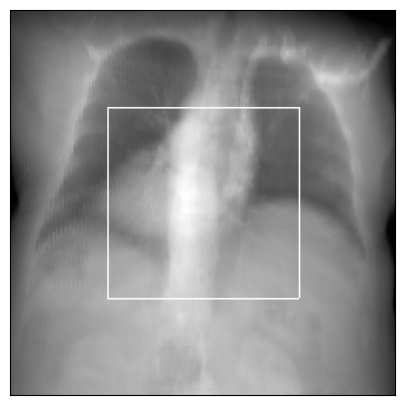

In [27]:
#| cuda
# Read in the volume and get the isocenter
volume, spacing = load_example_ct()
bx0, by0, bz0 = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx0.dtype)
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx.dtype)
# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr0 = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=300.0,  # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,  # Pixel spacing (in mm)
).to(device)
drr1 = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[0]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.25,  # Pixel spacing (in mm)
).to(device)
drr2 = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[0]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.50,  # Pixel spacing (in mm)
).to(device)

drr=drr2

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations0 = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
ic(rotations0)
ic(rotations0.dtype)
rotations = torch.tensor([[float(alpha[0]), float(beta[0]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,63:187,63] = imgMax
img[0,0,63:187,187] = imgMax
img[0,0,63,63:187] = imgMax
img[0,0,187,63:187] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Adapted from diffdrr/visualization.py/plot_drr

In [ ]:
def plot_drrMany(
    img: torch.Tensor,
    title: str | None = None,
    ticks: bool | None = True,
    axs: matplotlib.axes._axes.Axes | None = None,
    cmap: str = "gray",
    **imshow_kwargs,
):
    """Plot an image generated by a DRR module."""

    if axs is None:
        fig, axs = plt.subplots(ncols=len(img), figsize=(10, 5))
    if len(img) == 1:
        axs = [axs]
    for img, ax in zip(img, axs):
        ax.imshow(img.squeeze().cpu().detach(), cmap=cmap, **imshow_kwargs)
        _, height, width = img.shape
        ax.xaxis.tick_top()
        ax.set(
            xlabel=title,
            xticks=[0, width - 1],
            xticklabels=[1, width],
            yticks=[0, height - 1],
            yticklabels=[1, height],
        )
        if ticks is False:
            ax.set_xticks([])
            ax.set_yticks([])
    return axs

Display Wide FOV for camera [10]

ic| rotations: tensor([[ 2.6307, -0.3508,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 250, 250])
ic| imgMax: tensor(81.8833, device='cuda:0')


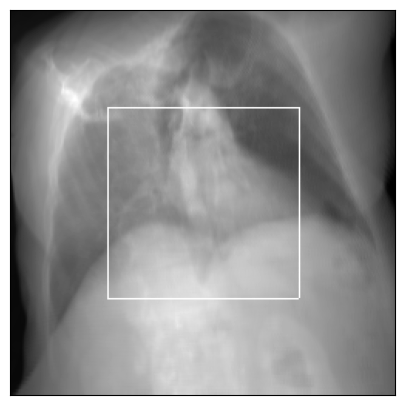

In [28]:
rotations = torch.tensor([[float(alpha[10]), float(beta[10]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,63:187,63] = imgMax
img[0,0,63:187,187] = imgMax
img[0,0,63,63:187] = imgMax
img[0,0,187,63:187] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Display Wide FOV Series for cameras [0:19]

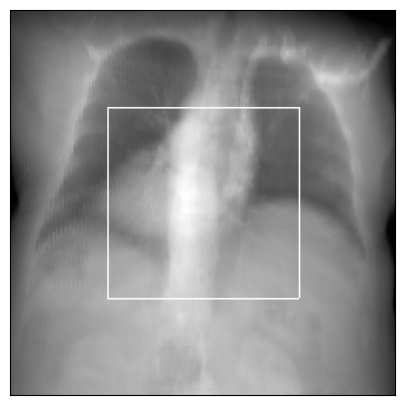

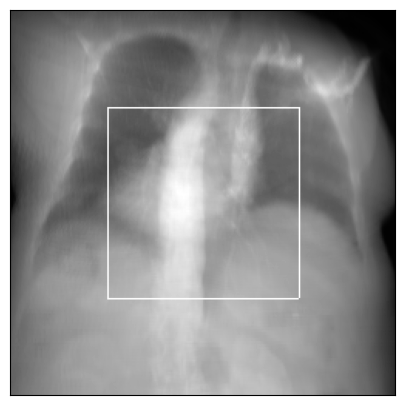

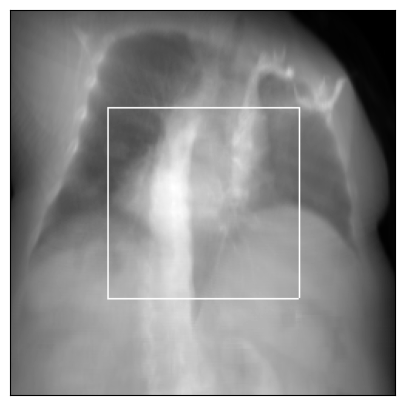

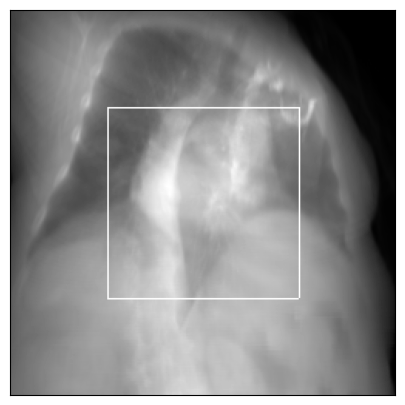

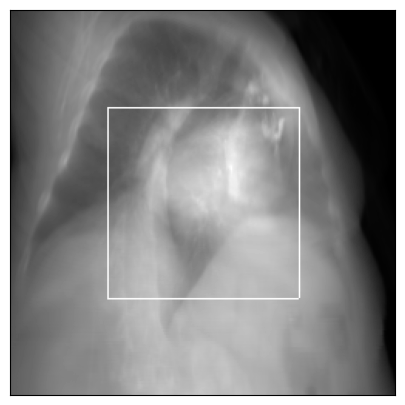

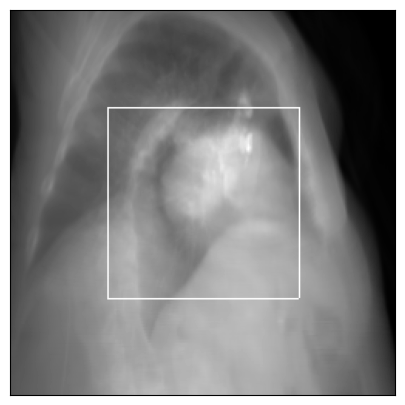

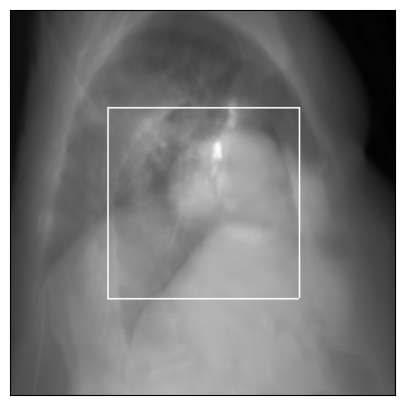

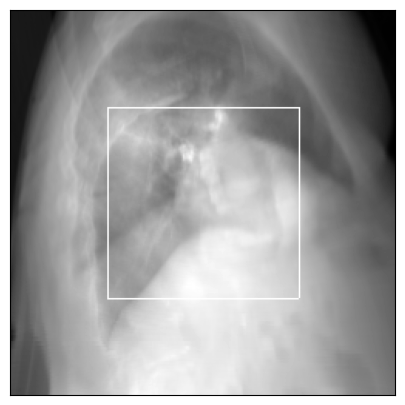

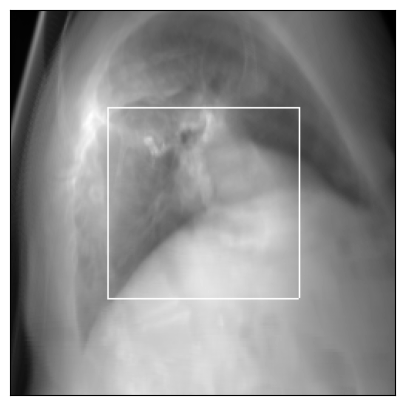

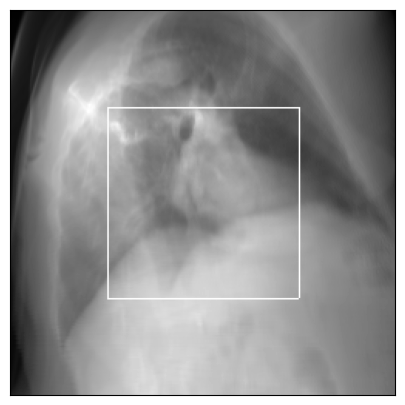

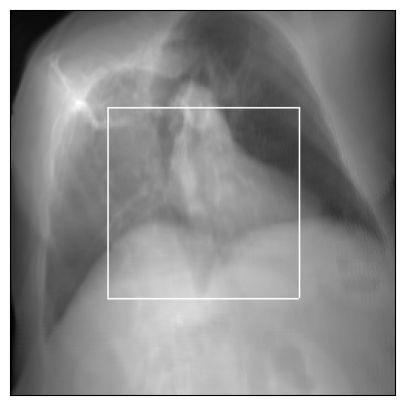

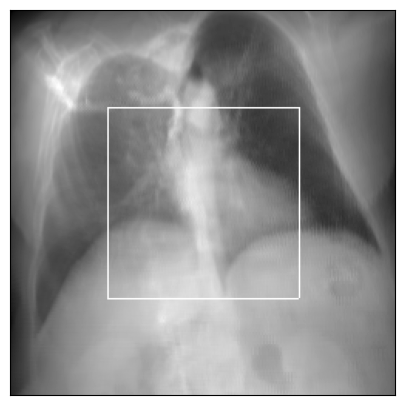

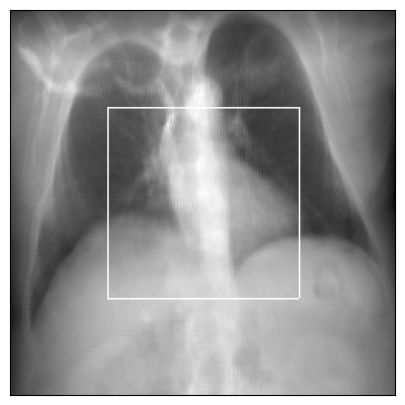

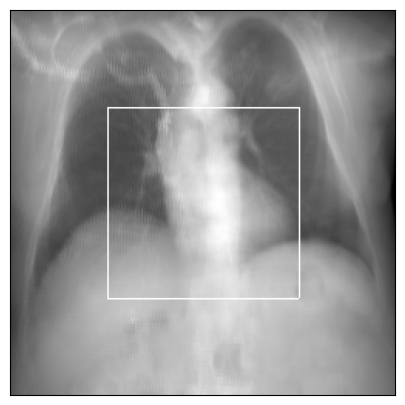

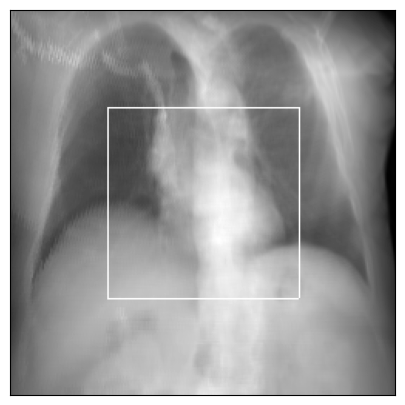

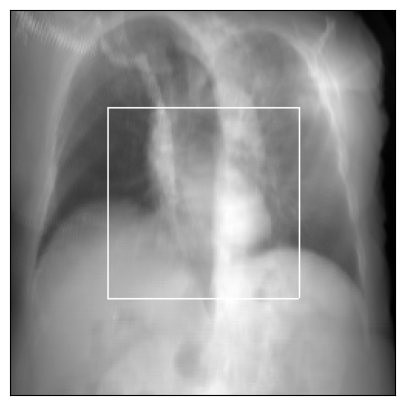

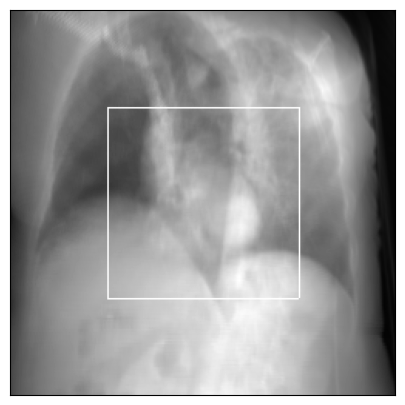

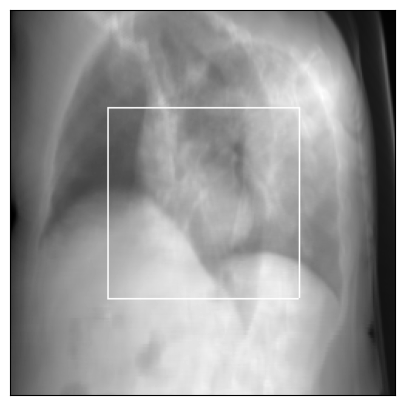

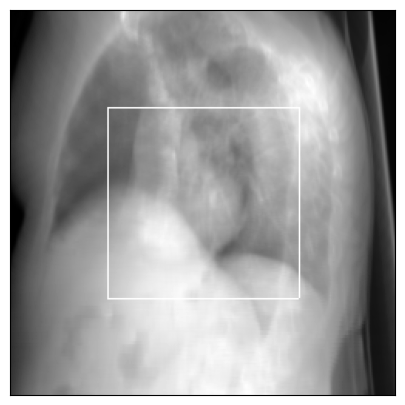

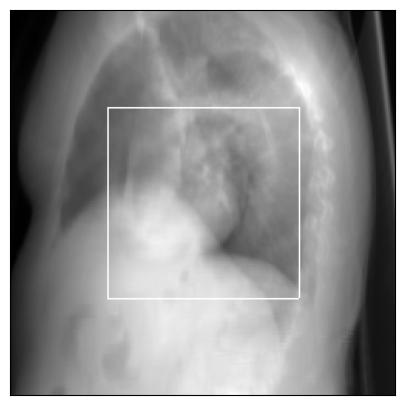

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [29]:
for imod in range(0,20):
  drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.50,  # Pixel spacing (in mm)
  ).to(device)

  # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
  rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
  translations = torch.tensor([[bx, by, bz]], device=device)
  img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
  imgMax=img.max()
  img[0,0,63:187,63] = imgMax
  img[0,0,63:187,187] = imgMax
  img[0,0,63,63:187] = imgMax
  img[0,0,187,63:187] = imgMax
  plot_drr(img, ticks=False)
  plt.show()

ic(img.shape)

Compact Wide FOV Display for all 80 modules

ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([1, 1, 1000, 5000])


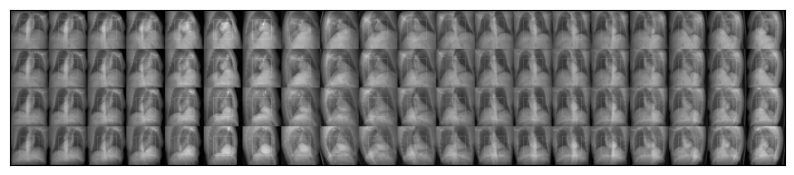

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [83]:
#BigImage=torch.zeros(4,250,20,250)
BigImage=img.tile(4,20).resize(4,250,20,250)
ic(BigImage.shape)

#for iRow in range(0,4):
#  for iCol in range(0,20):
for iRow in range(0,4):
  for iCol in range(0,20):
    imod=iRow*20+iCol

    drr = DRR(
        volume,  # The CT volume as a numpy array
        spacing,  # Voxel dimensions of the CT
        sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
        height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
        delx=2.50,  # Pixel spacing (in mm)
          ).to(device)

    # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
    rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
    translations = torch.tensor([[bx, by, bz]], device=device)
    img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
    imgMax=img.max()
    img[0,0,63:187,63] = imgMax
    img[0,0,63:187,187] = imgMax
    img[0,0,63,63:187] = imgMax
    img[0,0,187,63:187] = imgMax
    BigImage[iRow,:,iCol,:]=img[0,0,:,:]

ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1000,5000)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)

Display FOV Series for cameras [0:19]

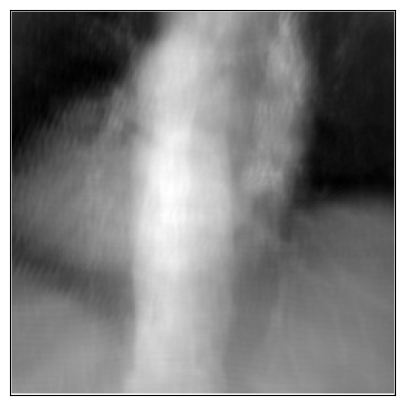

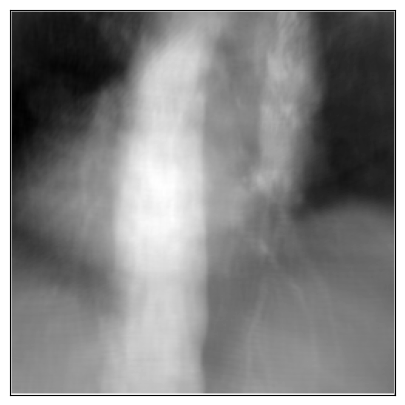

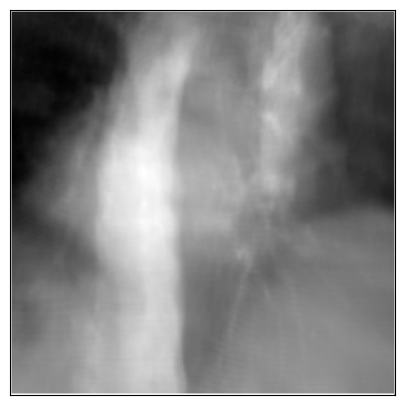

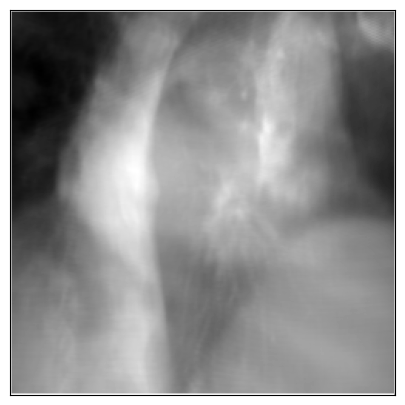

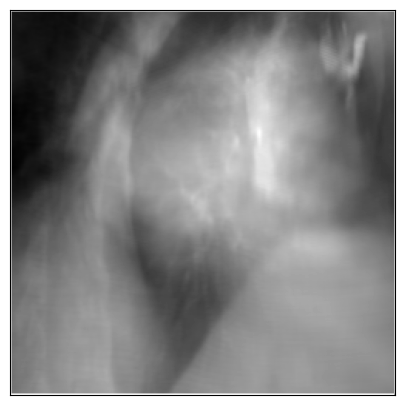

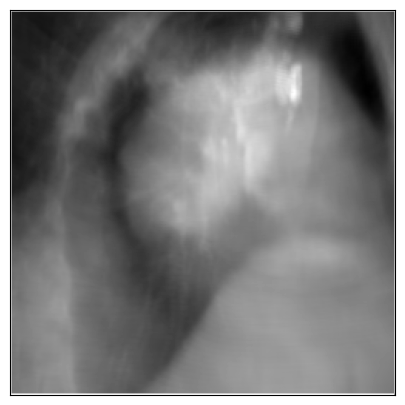

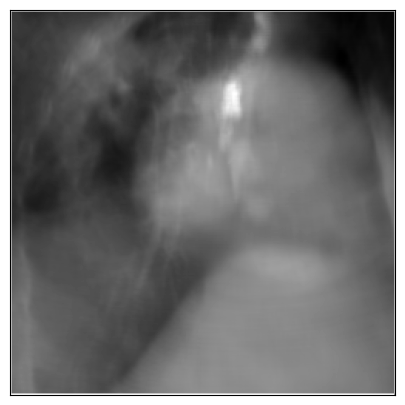

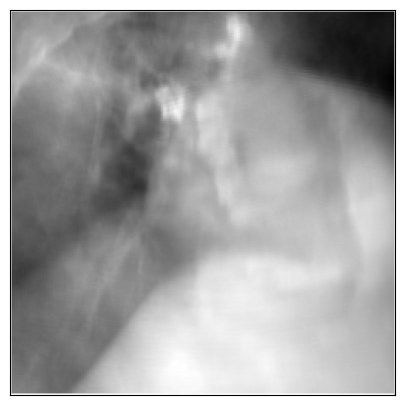

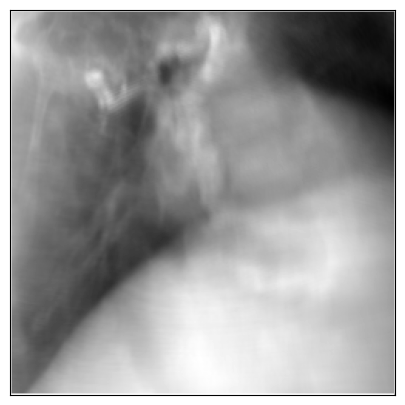

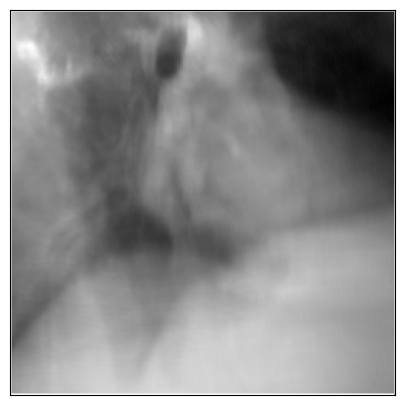

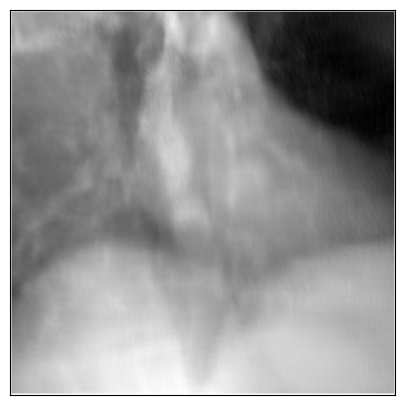

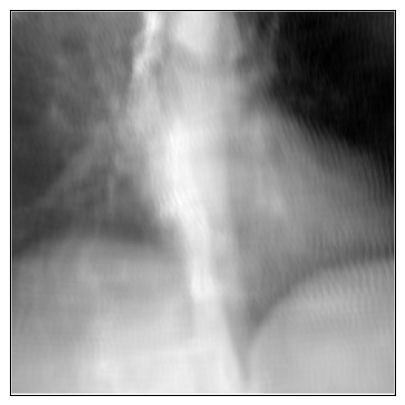

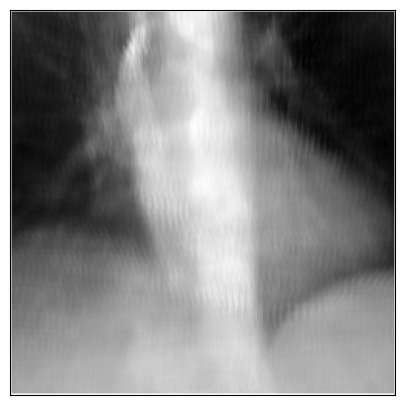

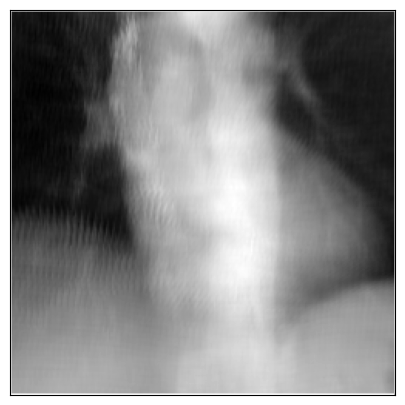

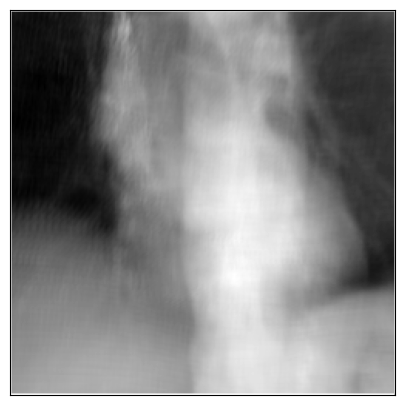

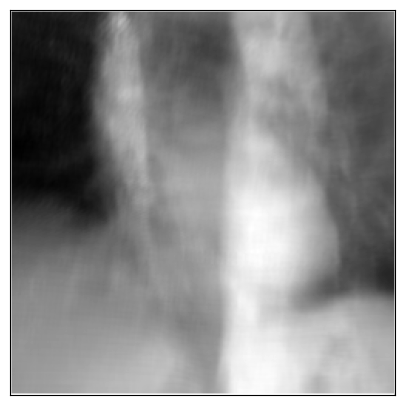

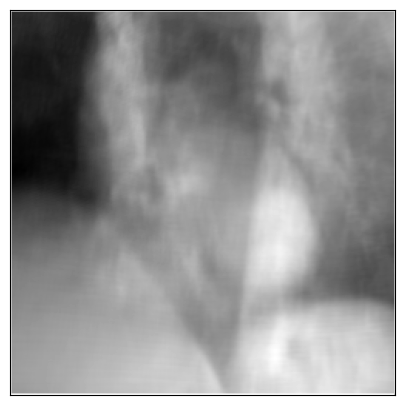

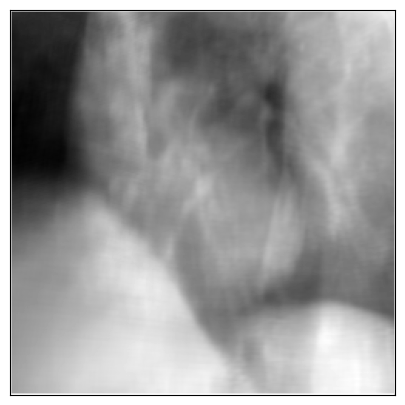

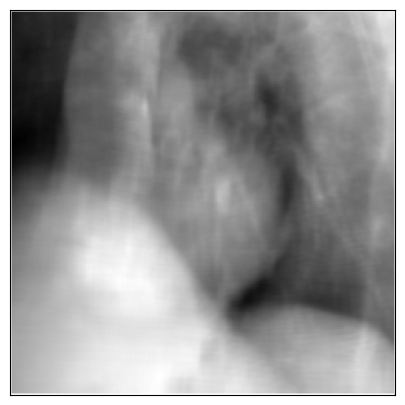

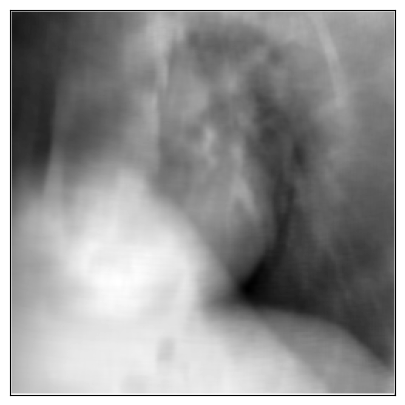

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [84]:
for imod in range(0,20):
  drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.25,  # Pixel spacing (in mm)
  ).to(device)

  # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
  rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
  translations = torch.tensor([[bx, by, bz]], device=device)
  img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
  imgMax=img.max()
  img[0,0,0:249,0] = imgMax
  img[0,0,0:249,249] = imgMax
  img[0,0,0,0:249] = imgMax
  img[0,0,249,0:249] = imgMax
  plot_drr(img, ticks=False)
  plt.show()

ic(img.shape)

Compact FOV Display for all 80 modules

/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([1, 1, 1000, 5000])


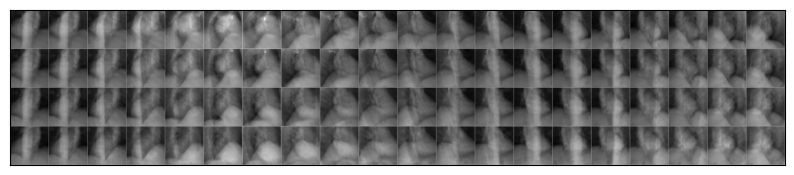

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [85]:
#BigImage=torch.zeros(4,250,20,250)
BigImage=img.tile(4,20).resize(4,250,20,250)
ic(BigImage.shape)

#for iRow in range(0,4):
#  for iCol in range(0,20):
for iRow in range(0,4):
  for iCol in range(0,20):
    imod=iRow*20+iCol

    drr = DRR(
        volume,  # The CT volume as a numpy array
        spacing,  # Voxel dimensions of the CT
        sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
        height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
        delx=1.25,  # Pixel spacing (in mm)
          ).to(device)

    # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
    rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
    translations = torch.tensor([[bx, by, bz]], device=device)
    img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
    imgMax=img.max()
    img[0,0,0:249,0] = imgMax
    img[0,0,0:249,249] = imgMax
    img[0,0,0,0:249] = imgMax
    img[0,0,249,0:249] = imgMax
    BigImage[iRow,:,iCol,:]=img[0,0,:,:]

ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1000,5000)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)